<a href="https://colab.research.google.com/github/EgorMatveev26/Datasets/blob/main/%D0%9B%D0%A0_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

# Загрузка данных
Используемый набор данных содержит информацию о волейболистках, включая различные статистические показатели волейболисток на турнире VNL2024, их возраст, страны, за которые выступают спортсменки и позиции, на которых они играют. Каждая строка представляет отдельного спортсмена, а столбцы содержат следующие переменные:
- **player**: Имя волейболистки
- **country**: Страна, за которую выступает спортсменка
- **age**: Возраст волейболистки
- **attack**: Эффективность атакующих действий игрока
- **block**: Эффективность блокирования атак соперников
- **serve**: Эффективность подач игрока
- **set**: Показатель качественного пасса
- **dig**: Показатель защиты
- **receive**: Эффективность приёма подач соперника
- **position**: Позиция, на которой играет волейболистка

URL-адрес набора данных:

https://raw.githubusercontent.com/EgorMatveev26/Datasets/refs/heads/main/vnl2024.csv

# Загрузка данных

In [121]:
# Присвоим переменной «url» ссылку на датасет:

url = 'https://raw.githubusercontent.com/EgorMatveev26/Datasets/refs/heads/main/vnl2024.csv'

# Создаем лист с названием столбцов:

cols = ['player', 'country', 'age', 'attack', 'block', 'serve', 'set', 'dig', 'receive', 'position']

# Используем Pandas read_csv():

dataset = pd.read_csv(url, names = cols)

# Подготовка данных

In [122]:
# Размер датасета: 267 записей(строк), 10 столбцов

dataset.shape

(267, 10)

In [123]:
# Отображаем первые 10 строк датасета

dataset.head(10)

,player,country,age,attack,block,serve,set,dig,receive,position
0,Vargas,TUR,24,20.25,1.62,1.50,0.0,7.75,0.00,OP
1,Koga,JPN,28,17.67,0.78,1.11,0.0,11.22,1.11,OH
2,Van Ryk,CAN,25,16.44,0.89,1.11,0.0,12.56,0.11,OH
3,Li Y.Y.,CHN,24,16.33,0.56,1.00,0.0,8.22,3.56,OH
4,Gray,CAN,30,15.22,0.44,1.00,0.0,9.44,5.56,OH
5,Egonu,ITA,25,14.60,2.40,2.20,0.0,4.20,0.00,OP
6,Stysiak,POL,23,14.12,1.50,0.38,0.0,8.38,0.00,OP
7,Gabi,BRA,30,14.12,0.88,1.12,0.0,9.50,5.25,OH
8,Ishikawa,JPN,24,13.78,0.56,0.56,0.0,7.67,4.11,OH
9,Ana Cristina,BRA,20,12.62,1.38,0.88,0.0,6.75,4.62,OH


In [124]:
# Проверка на отсутствующие значения
print(dataset.isnull().sum())
# Удаление строк с пропущенными значениями, если они есть
dataset.dropna(inplace=True)

player      0
country     0
age         0
attack      0
block       0
serve       0
set         0
dig         0
receive     0
position    0
dtype: int64


In [125]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    267 non-null    object 
 1   country   267 non-null    object 
 2   age       267 non-null    int64  
 3   attack    267 non-null    float64
 4   block     267 non-null    float64
 5   serve     267 non-null    float64
 6   set       267 non-null    float64
 7   dig       267 non-null    float64
 8   receive   267 non-null    float64
 9   position  267 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 21.0+ KB


In [126]:
# Категориальные переменные заменим на коды, создав для них дополнительные столбцы
# Столбец TotalCharges после удаления пустот можно заменить на float
dataset["player"] = dataset["player"].astype('category')
dataset["country"] = dataset["country"].astype('category')

In [127]:
# Проверим, что столбцы object отсутствуют
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   player    267 non-null    category
 1   country   267 non-null    category
 2   age       267 non-null    int64   
 3   attack    267 non-null    float64 
 4   block     267 non-null    float64 
 5   serve     267 non-null    float64 
 6   set       267 non-null    float64 
 7   dig       267 non-null    float64 
 8   receive   267 non-null    float64 
 9   position  267 non-null    object  
dtypes: category(2), float64(6), int64(1), object(1)
memory usage: 28.5+ KB


# Анализ данных

In [128]:
# Посмотрим на датасет, готовый к работе
dataset.head()

,player,country,age,attack,block,serve,set,dig,receive,position
0,Vargas,TUR,24,20.25,1.62,1.50,0.0,7.75,0.00,OP
1,Koga,JPN,28,17.67,0.78,1.11,0.0,11.22,1.11,OH
2,Van Ryk,CAN,25,16.44,0.89,1.11,0.0,12.56,0.11,OH
3,Li Y.Y.,CHN,24,16.33,0.56,1.00,0.0,8.22,3.56,OH
4,Gray,CAN,30,15.22,0.44,1.00,0.0,9.44,5.56,OH


In [129]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

dataset.describe()

,age,attack,block,serve,set,dig,receive
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,26.164794,3.377491,0.593071,0.316255,1.417154,3.422060,1.126742
std,4.127092,3.961171,0.708531,0.383091,4.504546,3.054636,1.895305
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.140000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,2.250000,0.400000,0.220000,0.000000,2.330000,0.110000
75%,29.000000,5.000000,1.000000,0.470000,0.000000,5.620000,1.670000
max,38.000000,20.250000,4.120000,2.200000,26.880000,12.560000,11.000000


In [130]:
dataset['position'].unique()

array(['OP', 'OH', 'MB', 'S', 'L'], dtype=object)

In [131]:
# Теперь проверим количество строк, которое принадлежит каждому классу:

dataset['position'].value_counts()

,count
position,
OH,85
MB,67
S,43
L,39
OP,33


Видим, что набор данных несбалансированный. Далее будем балансировать его.

# Визуализация данных

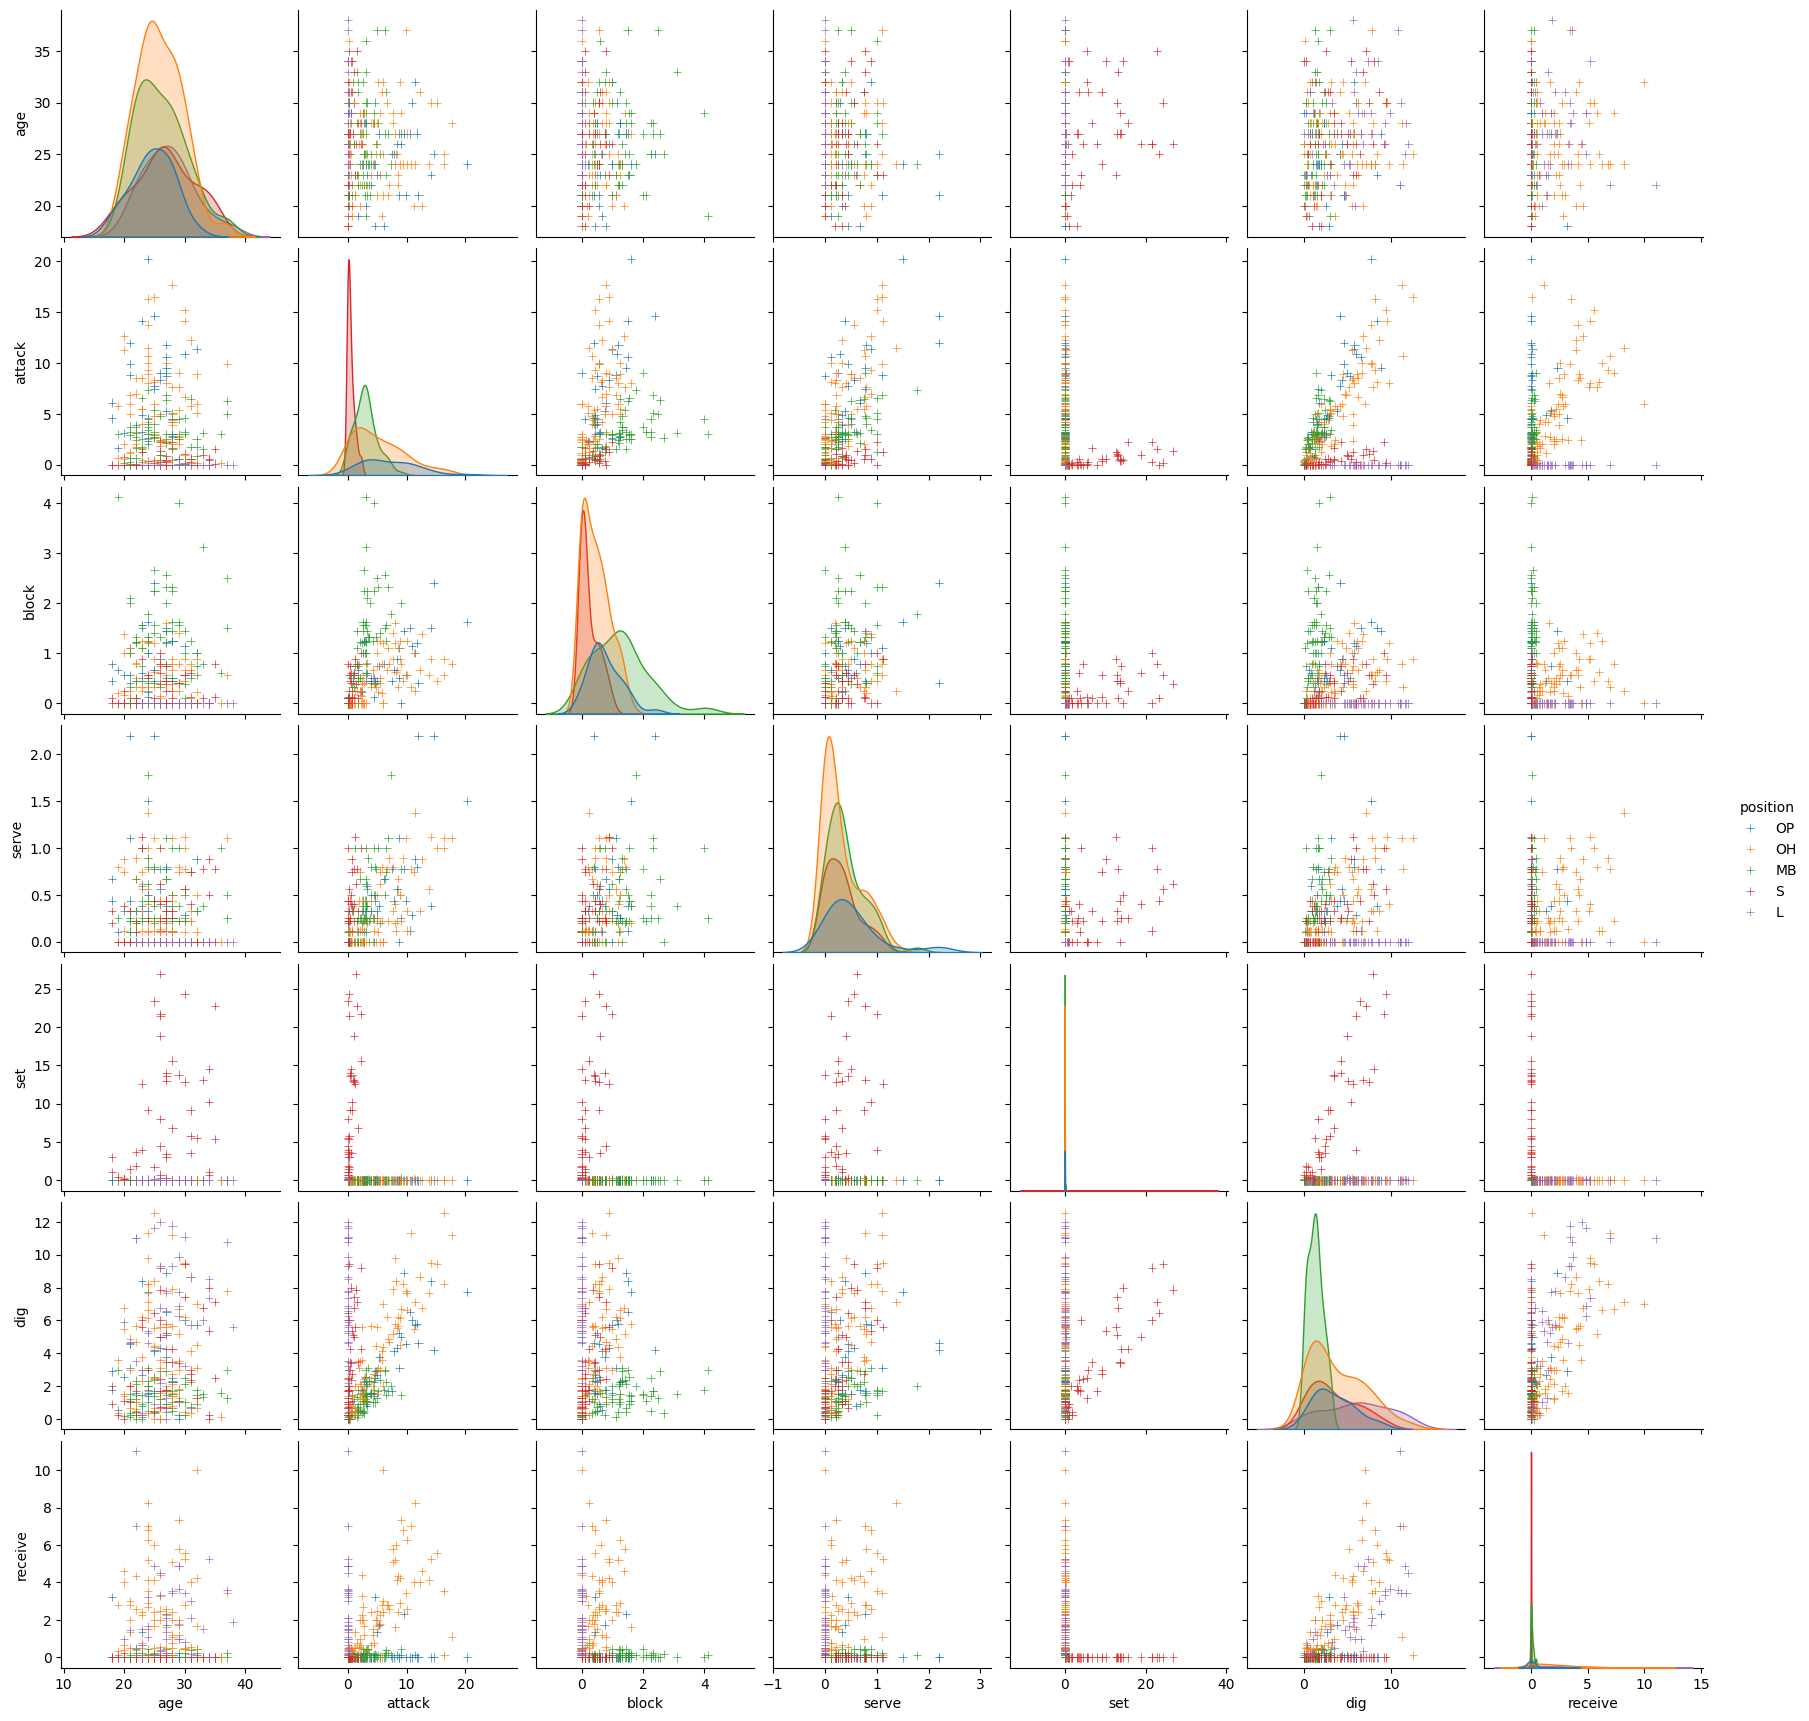

In [132]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(dataset, hue='position', markers='+')
plt.show()

Из графика можно сказать, что большинство возрастных игроков играют на позиции доигровщика, более высокая эффективность в атаке у связующих, доигровщики и связки имеют большую эффективность на блоке

In [133]:
# Создадим новый датасет без столбцов 'category'
dataset_new = dataset.select_dtypes(exclude=['category'])
dataset_new.dtypes

,0
age,int64
attack,float64
block,float64
serve,float64
set,float64
dig,float64
receive,float64
position,object


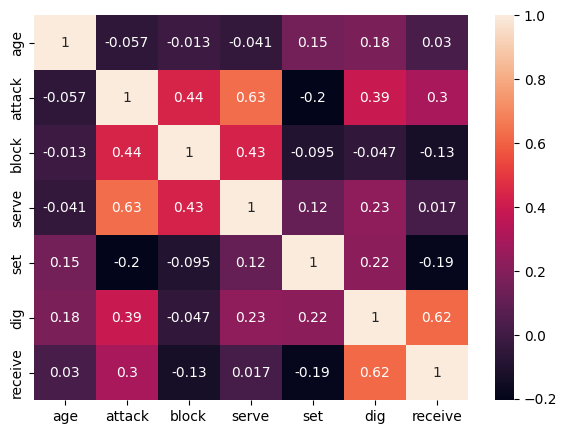

In [134]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец position.

В X складываем весь набор данных без целевой переменной.

In [135]:
X = dataset.drop(['position'], axis=1)
y = dataset['position']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (267, 9) | y shape: (267,) 


X имеет 267 строк и 9 столбцов, тогда как Y имеет 267 строк и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [137]:
print(set(y_train))  # Просмотр уникальных значений в y_train
print(type(y_train[0]))  # Проверка типа первого элемента

{'OP', 'OH', 'L', 'S', 'MB'}
<class 'str'>


In [138]:
# Преобразуем метки классов в числовой формат
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [139]:
# Выполняем балансировку классов
if sum(y_train) < len(y_train) / 2:
    # Если класс-меньшинство составляет менее половины выборки, используем oversampling
    oversampler = SMOTE()
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
else:
    # В противном случае используем undersampling
    undersampler = RandomUnderSampler()
    X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [140]:
# Преобразуем столбец с категориальными данными в набор бинарного столбца
X_resampled = pd.get_dummies(X_resampled)

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.769231 (0.091017)
LDA: 0.576923 (0.165876)
KNN: 0.676923 (0.153075)
CART: 0.769231 (0.097301)
NB: 0.523077 (0.096077)
SVC: 0.607692 (0.143704)


CART показал лучшие метрики среди всех алгоритмов.
Далее работаем с CART.

Давайте обучим модель CART на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель CART
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [144]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=101)

# Инициализация модели CART
cart_model = DecisionTreeClassifier(random_state=101)

# Обучение модели на тренировочном наборе
cart_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = cart_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')# Точность
print('Classification Report:')
print(report)

Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.25      0.40         8
           2       0.50      1.00      0.67         3
           3       0.57      0.80      0.67         5
           4       0.83      1.00      0.91         5

    accuracy                           0.69        26
   macro avg       0.74      0.77      0.69        26
weighted avg       0.79      0.69      0.66        26



Модель имеет точность 0.69 (или 69%), что говорит о том, что она правильно классифицирует 69% наблюдений в тестовой выборке.

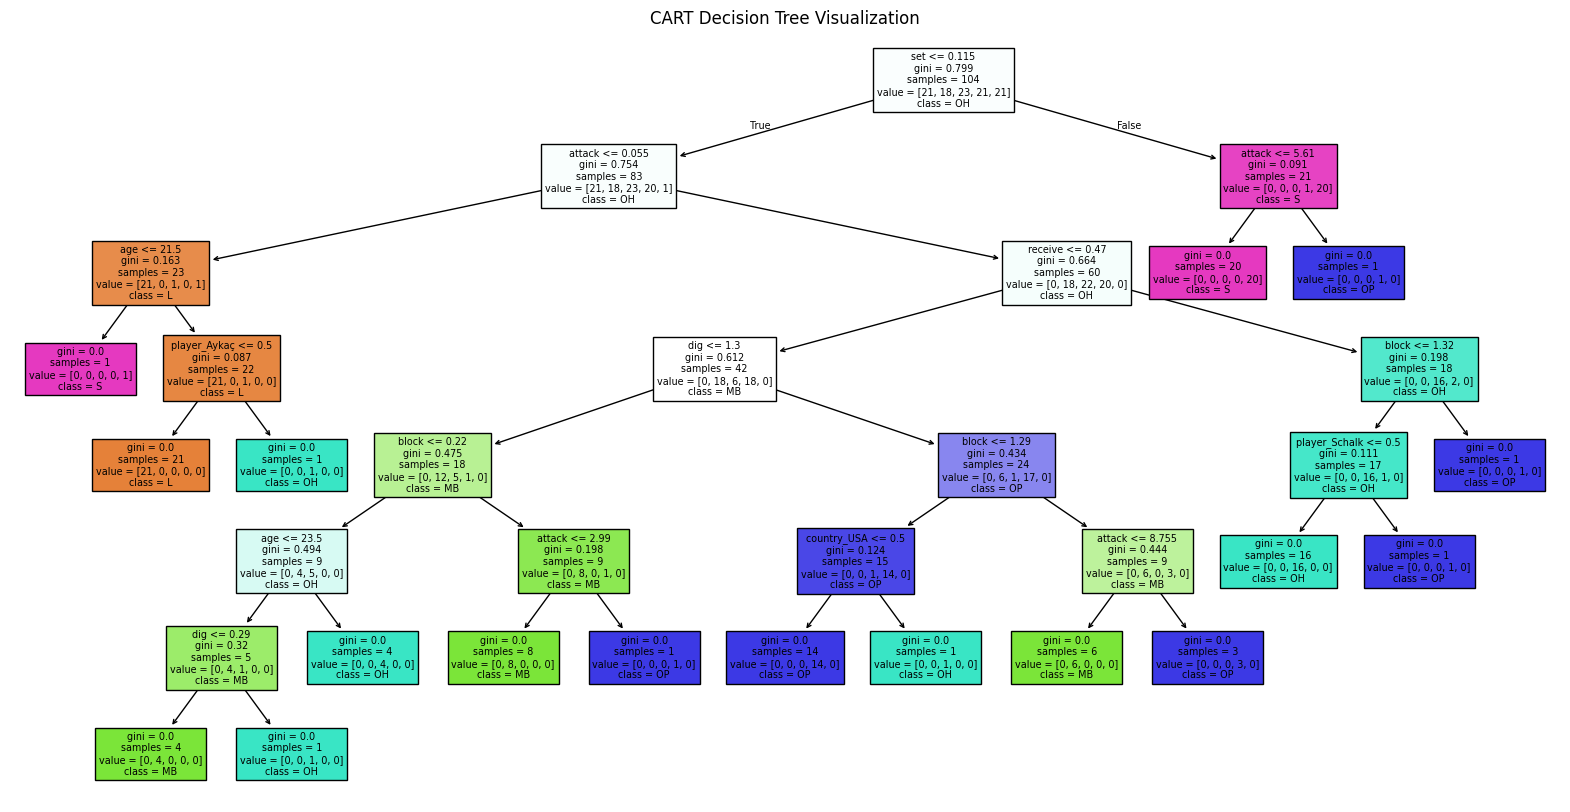

In [145]:
from sklearn import tree

# Визуализация дерева
plt.figure(figsize=(20, 10))
tree.plot_tree(cart_model, filled=True, feature_names=X_resampled.columns, class_names=le.classes_)
plt.title("CART Decision Tree Visualization")
plt.show()